

GRIP:SPARKS FOUNDATION (SEPTEMBER BATCH)


DECISION TREE VISUALIZATION -(IRIS DATASET)


NAME:LOHITHA BHUSARAPU


TASK6:TO CREATE DECISION TREE CLASSIFIER AND VISUALIZE IT



In [ ]:
from google.colab import drive 
drive.mount('/gdrive')


Mounted at /gdrive


Importing all the required libraries to carry out the decision tree algorithm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now reading the data from "Iris.csv" which i have stored it in my google drive with the help of pandas library

In [ ]:
path = '/gdrive/My Drive/GRIPS SPARKS/'
data = pd.read_csv(path+'Iris.csv')
data.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


Showing the rows and coloumns in Iris dataset

In [ ]:
data.shape

(150, 6)

Next, The main important step in Data-preprocessing is Label Encoding.
This is a step in which we change categorical data into numerical data (since all the data here should be of same type we do this) 

In [ ]:
from sklearn.preprocessing import LabelEncoder
species_label = LabelEncoder()
data['Species'] = species_label.fit_transform(data['Species'])

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


The next important step is to identify the input and output coloumns and spliting it accordingly


In [ ]:
input = data.drop(columns=['Id','Species'])
input

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
output = data['Species']
output

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [ ]:
I_label='Species'
I_features=input.columns 
I_features

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

TRAIN - TEST SPLITTING


In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(input,output,test_size=0.25,random_state=200)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((112, 4), (38, 4), (112,), (38,))

DECISION TREE CLASSIFIER MODEL

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
I_tree=DecisionTreeClassifier(criterion='gini')
I_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

the Gini index varies between values 0 and 1, where 0 expresses the purity of classification, i.e. All the elements belong to a specified class or only one class exists there. And 1 indicates the random distribution of elements across various classes. The value of 0.5 of the Gini Index shows an equal distribution of elements over some classes.

The final and most important step is visulaising the decision Tree

In [ ]:
from sklearn.tree import export_graphviz 
from pydotplus import graphviz as gr 
export_graphviz(I_tree,out_file='I_tree.dot',feature_names=I_features,class_names=I_label,rounded=True,precision=1,filled=True,special_characters=True)
graph=gr.graph_from_dot_file('I_tree.dot')
graph.write_png('I_tree.png')

True

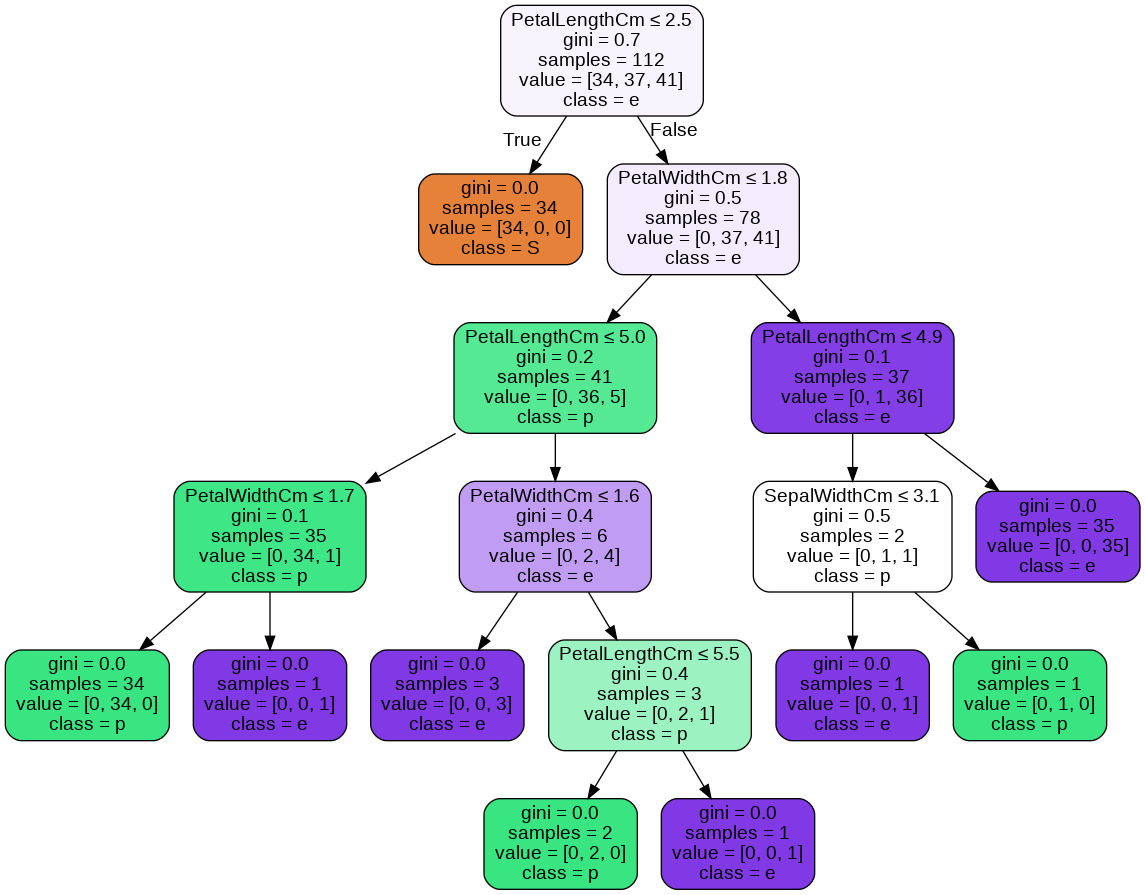

In [ ]:
from PIL import Image 
from IPython.display import display 
Im1=Image.open('I_tree.png')
display(Im1)